In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [3]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [4]:
# Input readable date
start_readable_date = "01-04-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-04-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1743440400
1746032399


In [5]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [6]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature   timestamp  volt  \
1743440452  26.17821     96.23   1009.54        26.83  1743440452  4.05   
1743440512  26.19694     96.28   1009.57        26.84  1743440512  4.05   
1743440572  26.21744     96.34   1009.53        26.85  1743440572  4.05   
1743440632  26.19753     96.34   1009.54        26.83  1743440632  4.05   
1743440692  26.19753     96.34   1009.51        26.83  1743440692  4.05   

            rainfall  rainrate  
1743440452       NaN       NaN  
1743440512       NaN       NaN  
1743440572       NaN       NaN  
1743440632       NaN       NaN  
1743440692       NaN       NaN  
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1743440408  26.17771  95.28176  1009.758    0.2794       0.0     27.00008   
1743440423  26.16456  95.31228  1009.763    0.2794       0.0     26.98138   
1743440438  26.14620  95.28367  1009.761    0.2794       0.0     26.96

In [7]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1745841463,24.06245,85.89,1009.32,26.62,1745841463,4.13,NaN,NaN
1745841523,24.06426,85.95,1009.37,26.61,1745841523,4.14,NaN,NaN
1745841583,24.10298,86.15,1009.38,26.61,1745841583,4.13,NaN,NaN
1745841643,24.07547,86.16,1009.39,26.58,1745841643,4.14,NaN,NaN
1745841703,24.03470,86.00,1009.38,26.57,1745841703,4.14,NaN,NaN
1745841763,24.08900,86.23,1009.38,26.58,1745841763,4.13,NaN,NaN
1745841823,24.06727,86.27,1009.37,26.55,1745841823,4.14,NaN,NaN
1745841883,24.08987,86.54,1009.38,26.52,1745841883,4.14,NaN,NaN
1745841943,24.08198,86.55,1009.41,26.51,1745841943,4.13,NaN,NaN
1745842003,24.05308,86.40,1009.41,26.51,1745842003,4.13,NaN,NaN


In [8]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate
1745841463,24.06245,85.89,1009.32,26.62,1745841463,4.13,NaN,NaN
1745841523,24.06426,85.95,1009.37,26.61,1745841523,4.14,NaN,NaN
1745841583,24.10298,86.15,1009.38,26.61,1745841583,4.13,NaN,NaN
1745841643,24.07547,86.16,1009.39,26.58,1745841643,4.14,NaN,NaN
1745841703,24.03470,86.00,1009.38,26.57,1745841703,4.14,NaN,NaN
1745841763,24.08900,86.23,1009.38,26.58,1745841763,4.13,NaN,NaN
1745841823,24.06727,86.27,1009.37,26.55,1745841823,4.14,NaN,NaN
1745841883,24.08987,86.54,1009.38,26.52,1745841883,4.14,NaN,NaN
1745841943,24.08198,86.55,1009.41,26.51,1745841943,4.13,NaN,NaN
1745842003,24.05308,86.40,1009.41,26.51,1745842003,4.13,NaN,NaN


In [9]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

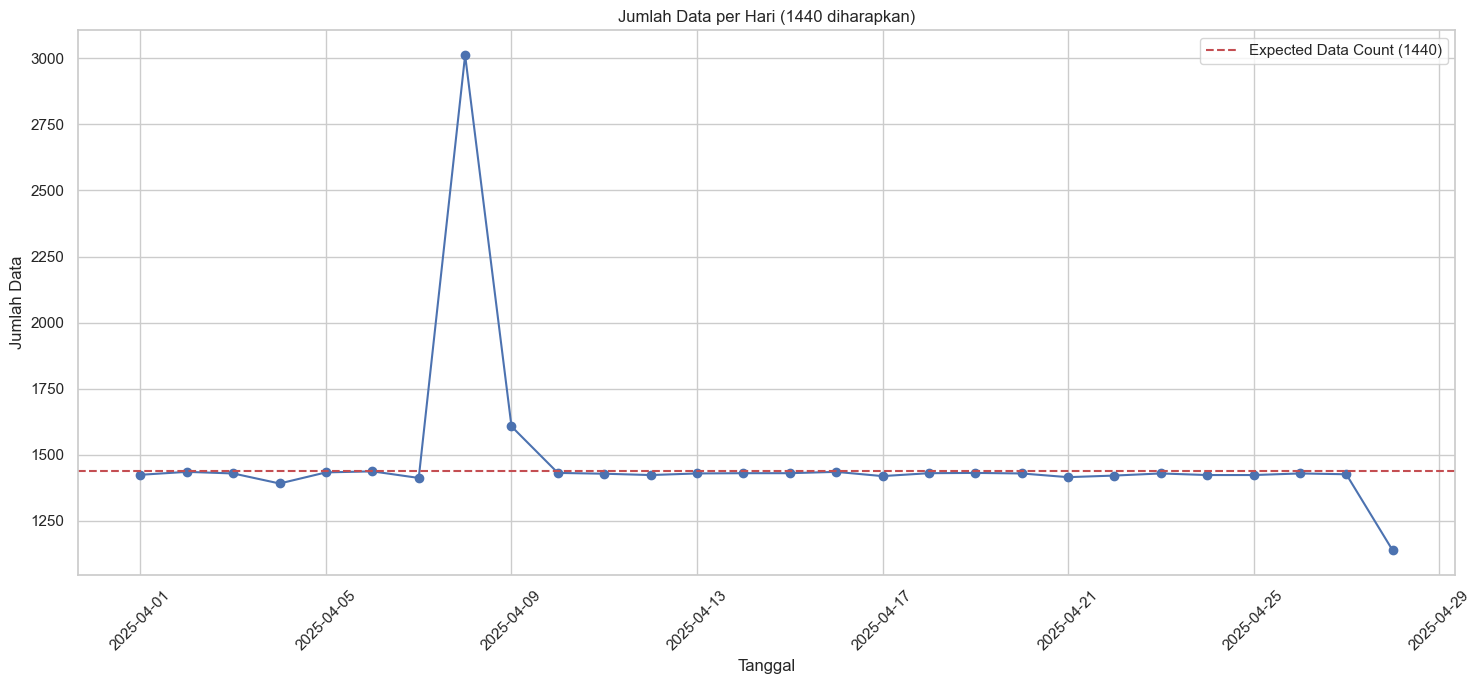

Hari dengan jumlah data yang kurang dari 1440:
          date  count
0   2025-04-01   1424
1   2025-04-02   1435
2   2025-04-03   1429
3   2025-04-04   1391
4   2025-04-05   1433
5   2025-04-06   1437
6   2025-04-07   1412
7   2025-04-08   3012
8   2025-04-09   1607
9   2025-04-10   1431
10  2025-04-11   1428
11  2025-04-12   1423
12  2025-04-13   1429
13  2025-04-14   1430
14  2025-04-15   1430
15  2025-04-16   1435
16  2025-04-17   1419
17  2025-04-18   1430
18  2025-04-19   1431
19  2025-04-20   1429
20  2025-04-21   1415
21  2025-04-22   1421
22  2025-04-23   1429
23  2025-04-24   1423
24  2025-04-25   1423
25  2025-04-26   1429
26  2025-04-27   1426
27  2025-04-28   1138


In [10]:
# Mengelompokkan data berdasarkan hari
cuaca1['date'] = cuaca1['timestamp'].dt.date
data_per_day = cuaca1.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [11]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
rainfall                            float64
rainrate                            float64
date                                 object
dtype: object

In [12]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [13]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt,rainfall,rainrate,date
1743440452,26.17821,96.23,1009.54,26.83,2025-04-01 00:00:52+07:00,4.05,NaN,NaN,2025-04-01
1743440512,26.19694,96.28,1009.57,26.84,2025-04-01 00:01:52+07:00,4.05,NaN,NaN,2025-04-01
1743440572,26.21744,96.34,1009.53,26.85,2025-04-01 00:02:52+07:00,4.05,NaN,NaN,2025-04-01
1743440632,26.19753,96.34,1009.54,26.83,2025-04-01 00:03:52+07:00,4.05,NaN,NaN,2025-04-01
1743440692,26.19753,96.34,1009.51,26.83,2025-04-01 00:04:52+07:00,4.05,NaN,NaN,2025-04-01
1743440752,26.17938,96.35,1009.51,26.81,2025-04-01 00:05:52+07:00,4.05,NaN,NaN,2025-04-01
1743440813,26.18290,96.37,1009.53,26.81,2025-04-01 00:06:53+07:00,4.05,NaN,NaN,2025-04-01
1743440873,26.19110,96.36,1009.47,26.82,2025-04-01 00:07:53+07:00,4.05,NaN,NaN,2025-04-01
1743440933,26.19461,96.38,1009.47,26.82,2025-04-01 00:08:53+07:00,4.05,NaN,NaN,2025-04-01
1743440993,26.20281,96.37,1009.41,26.83,2025-04-01 00:09:53+07:00,4.05,NaN,NaN,2025-04-01


In [14]:
datacuaca = cuaca1
datacuaca2 = cuaca2

Visualisasi missing values untuk datacuaca:


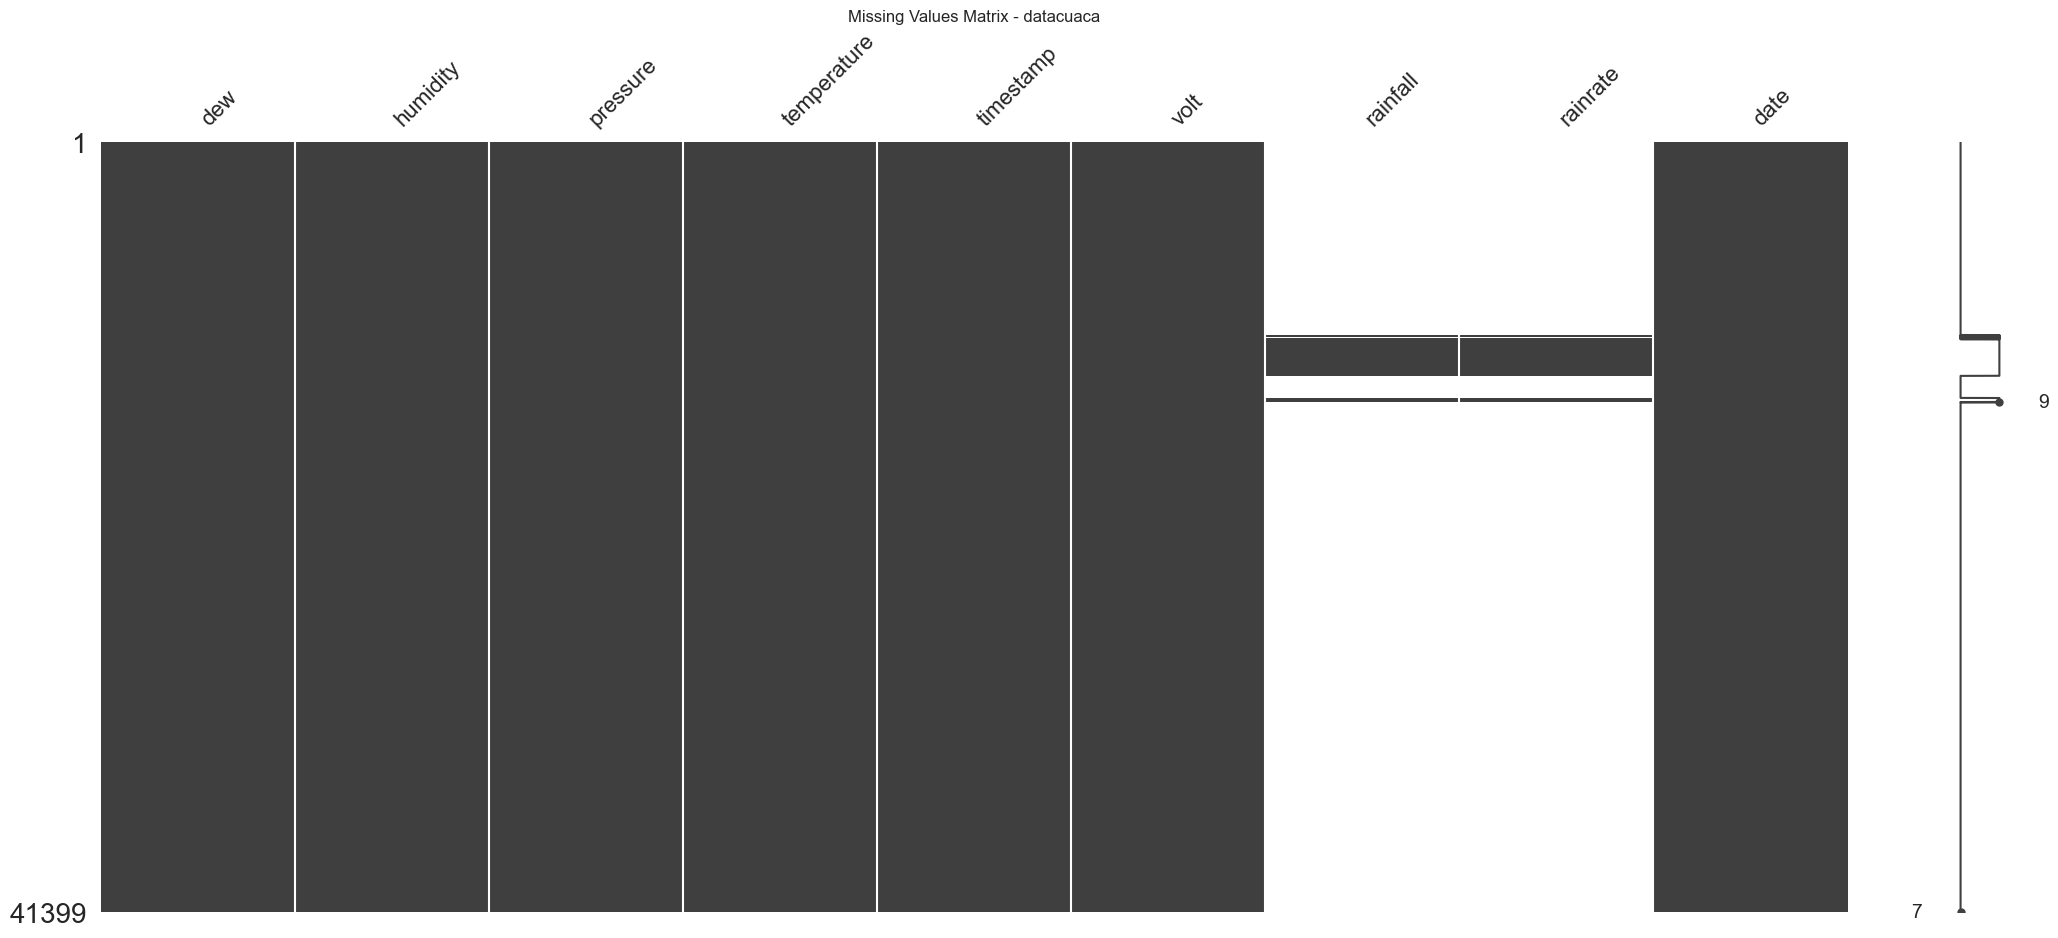

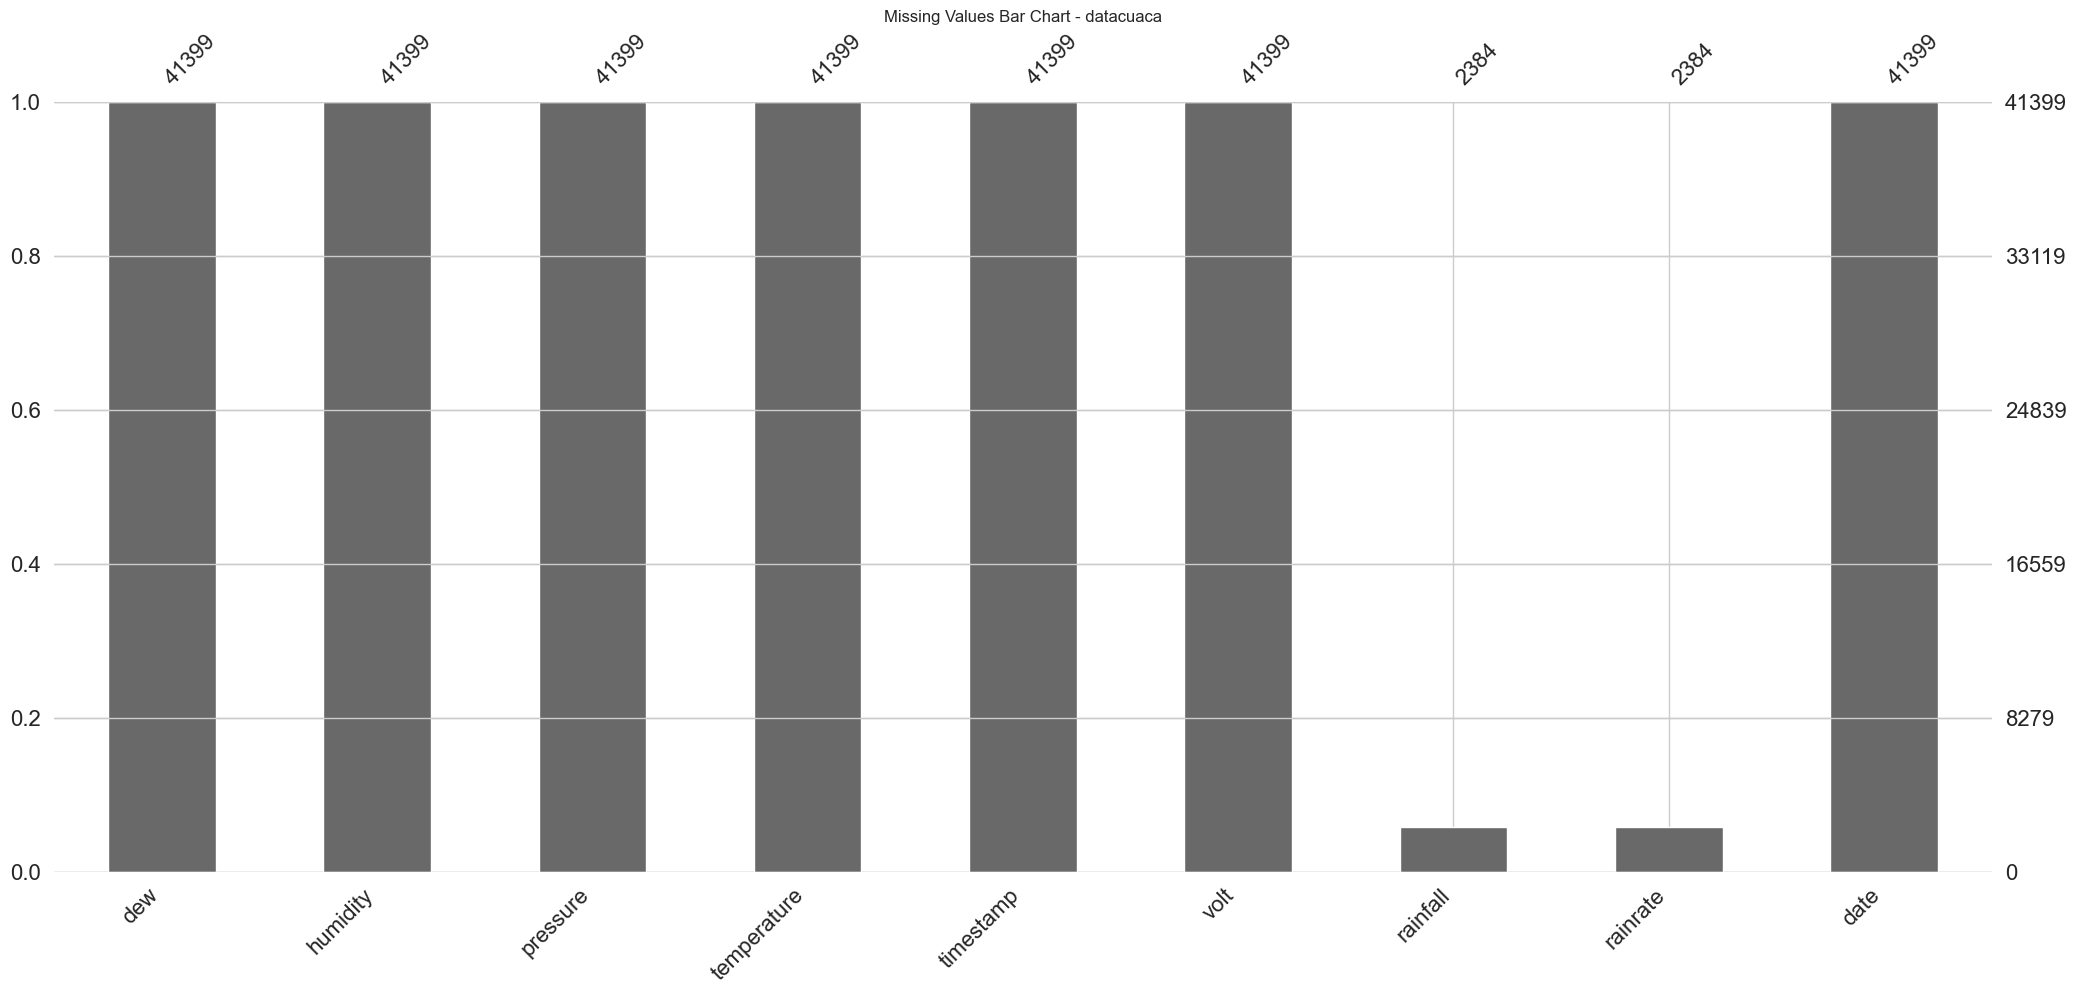

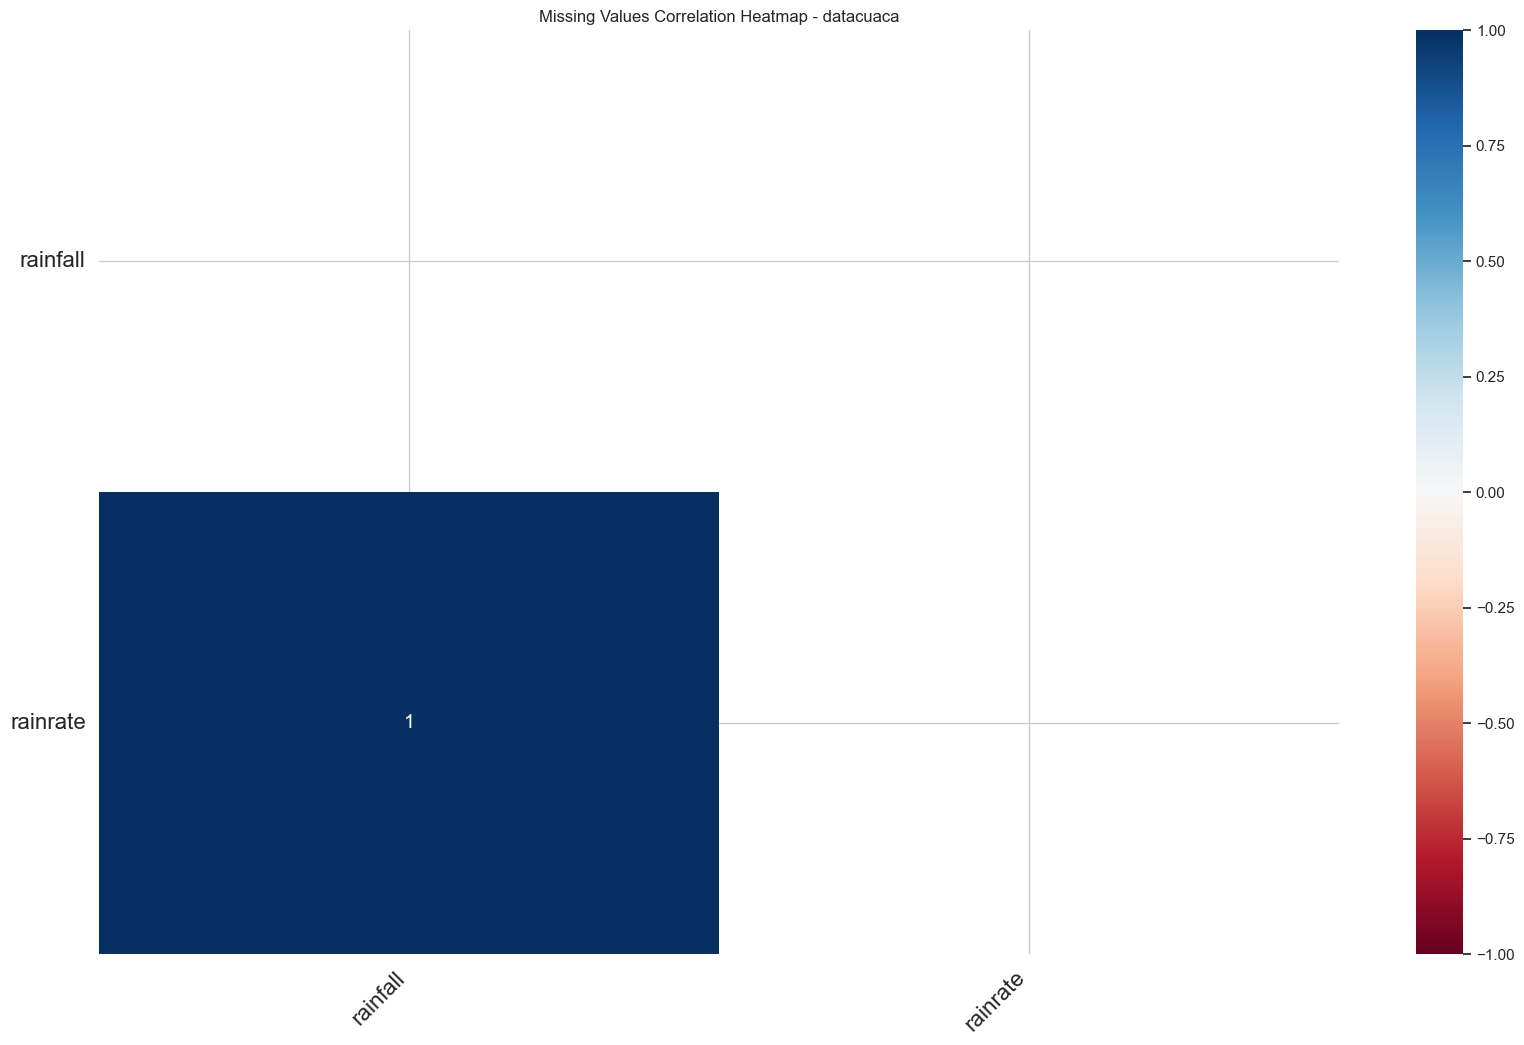

Visualisasi missing values untuk datacuaca2:


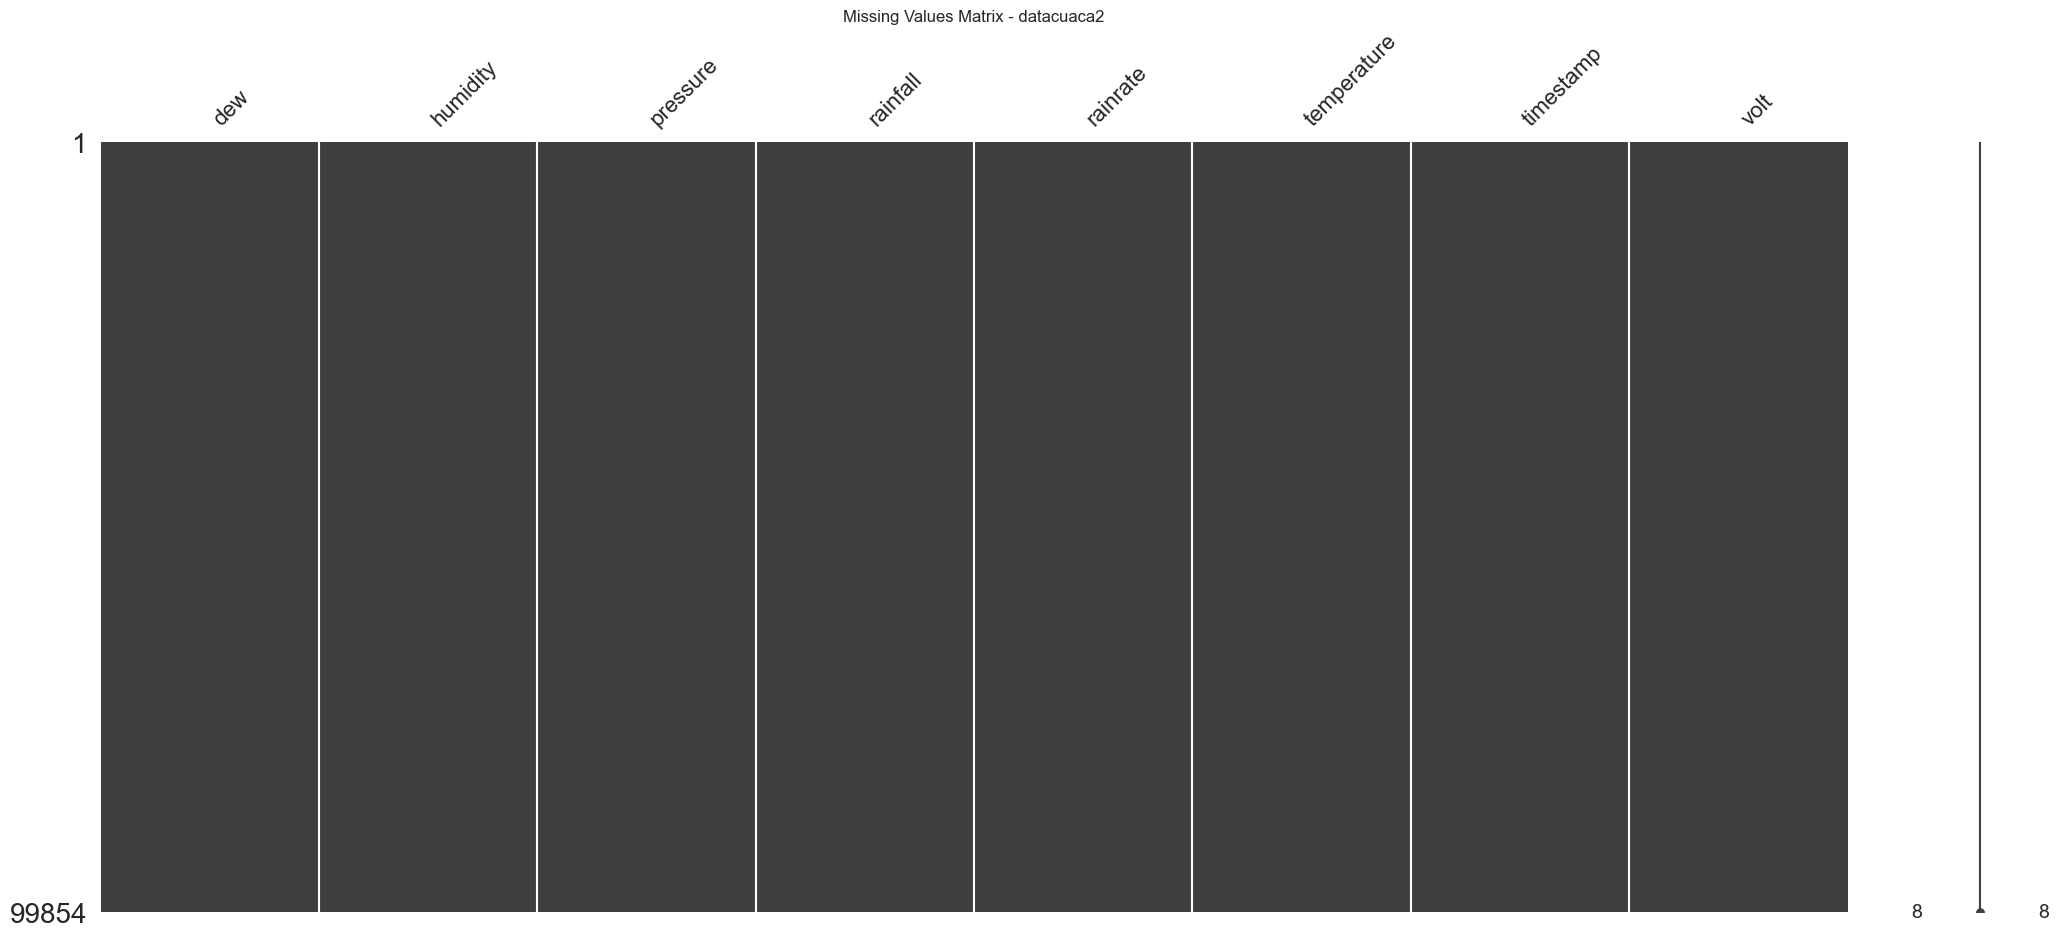

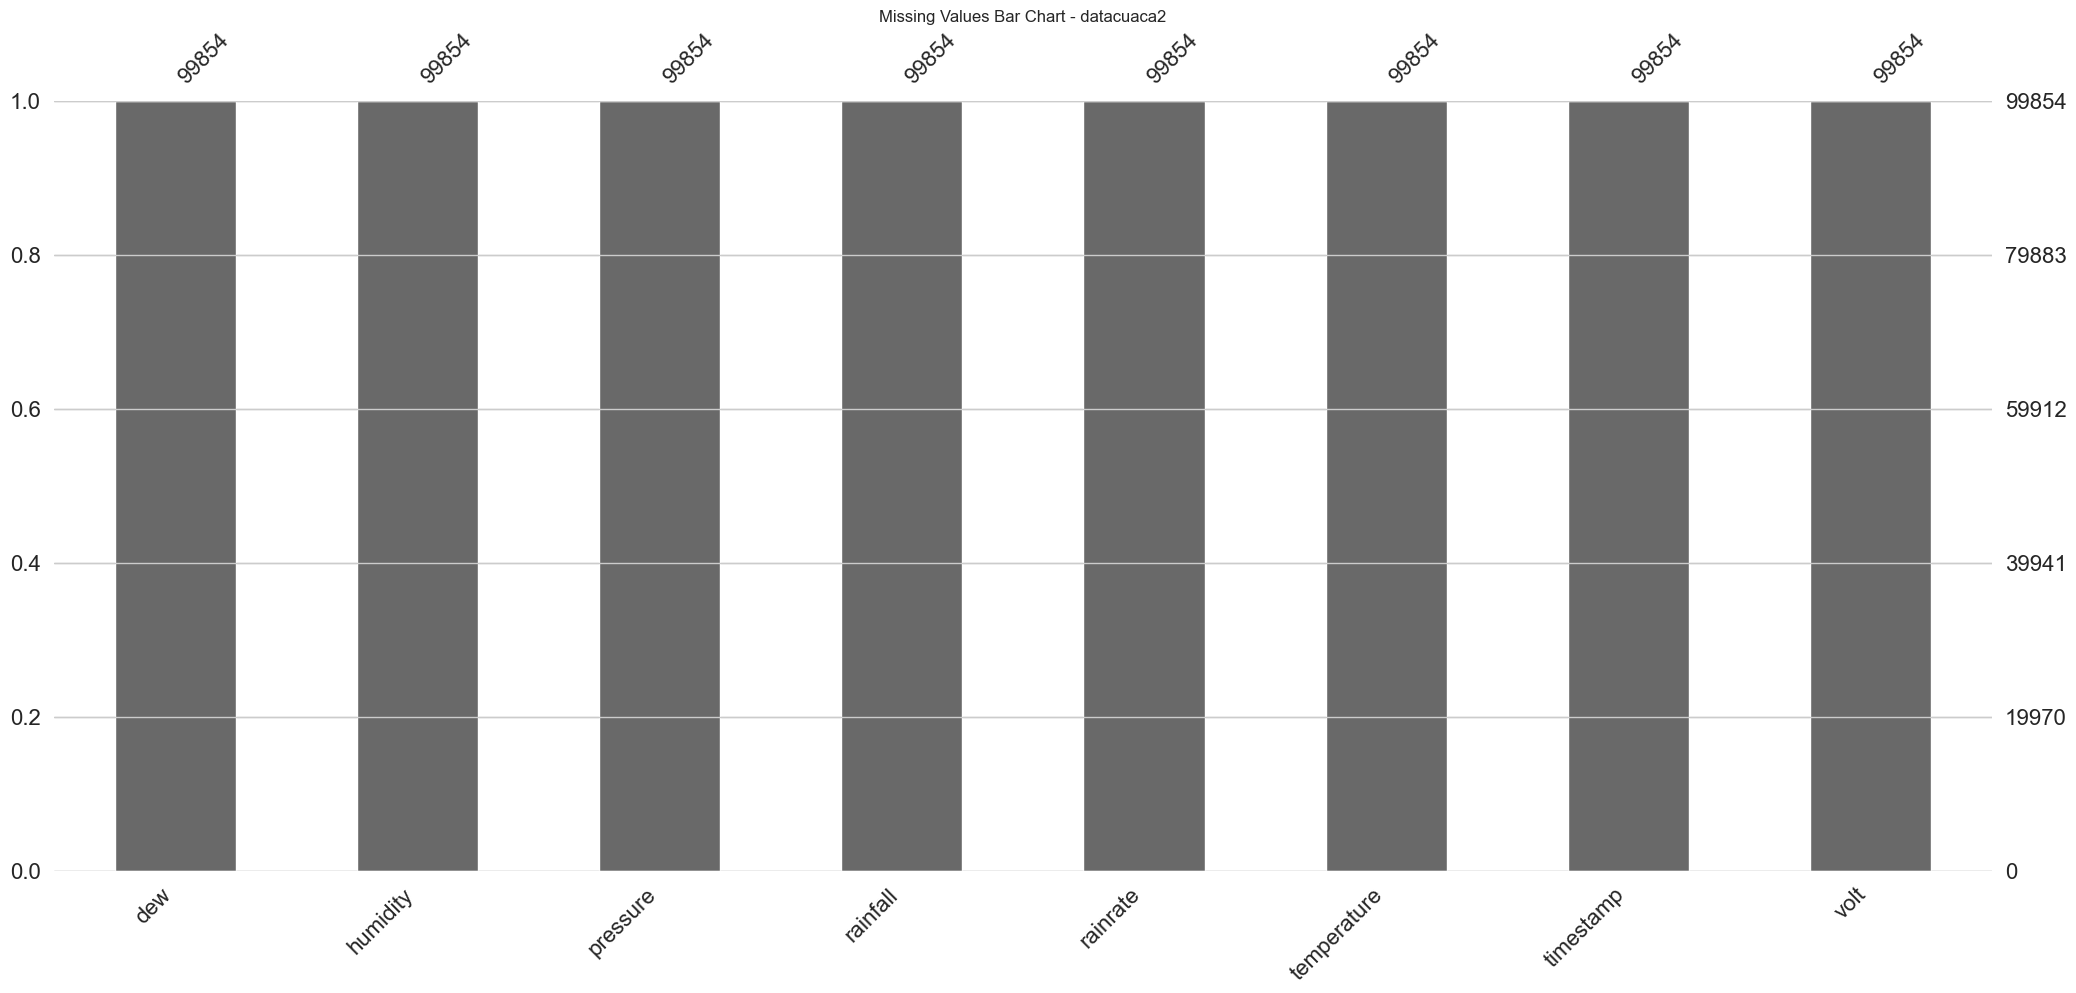

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


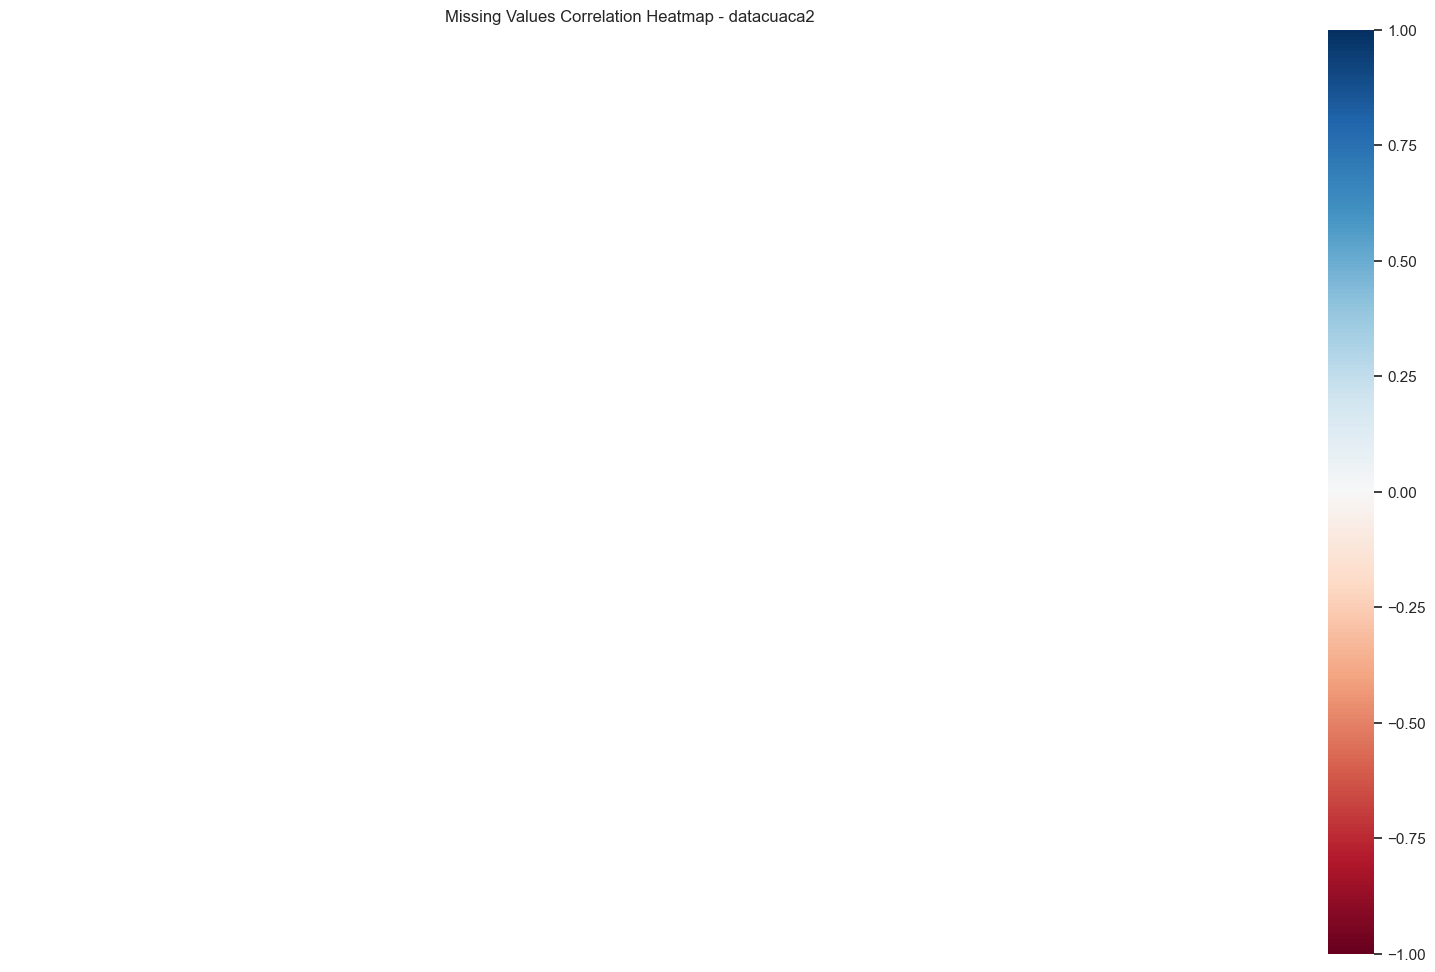

Ringkasan missing values untuk datacuaca:
dew                0
humidity           0
pressure           0
temperature        0
timestamp          0
volt               0
rainfall       39015
rainrate       39015
date               0
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew            0
humidity       0
pressure       0
rainfall       0
rainrate       0
temperature    0
timestamp      0
volt           0
dtype: int64


In [15]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

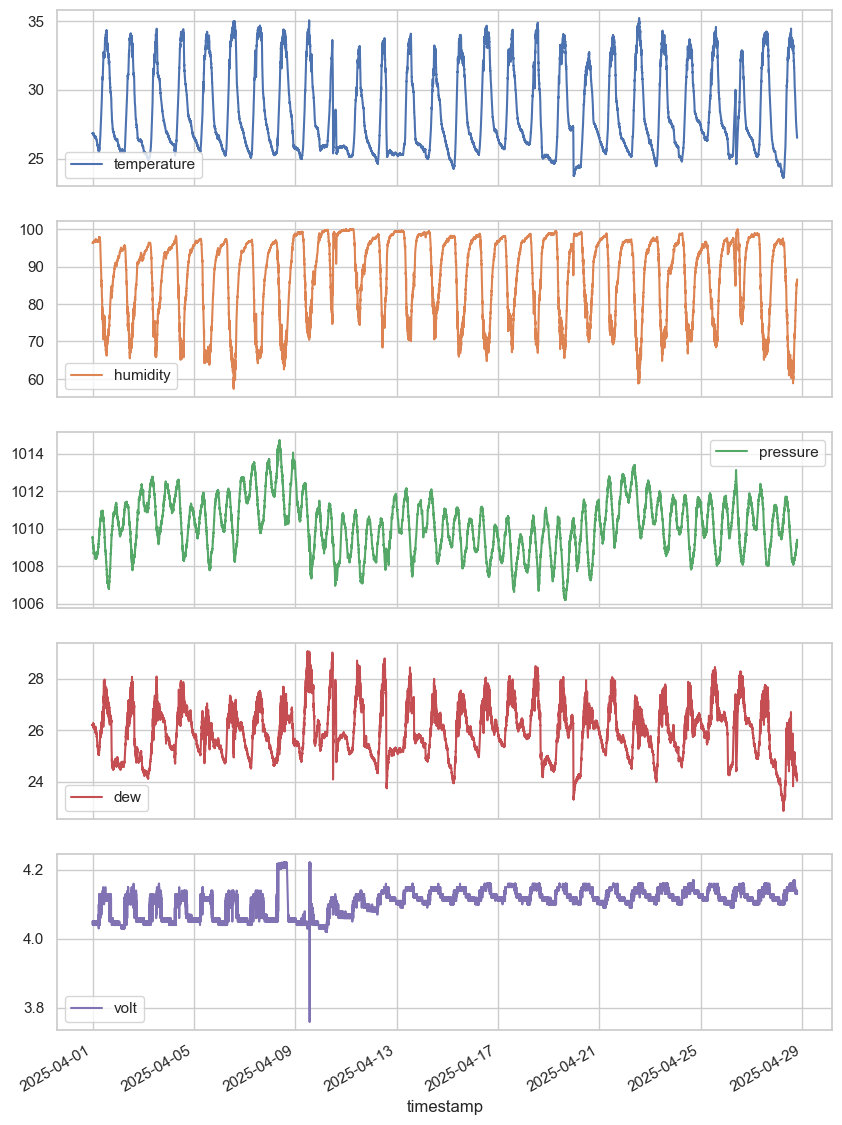

In [16]:
datacuaca.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    #'rainrate',
    #'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

In [17]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [18]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

In [19]:
pilih_tahun = 2025
pilih_bulan = 4

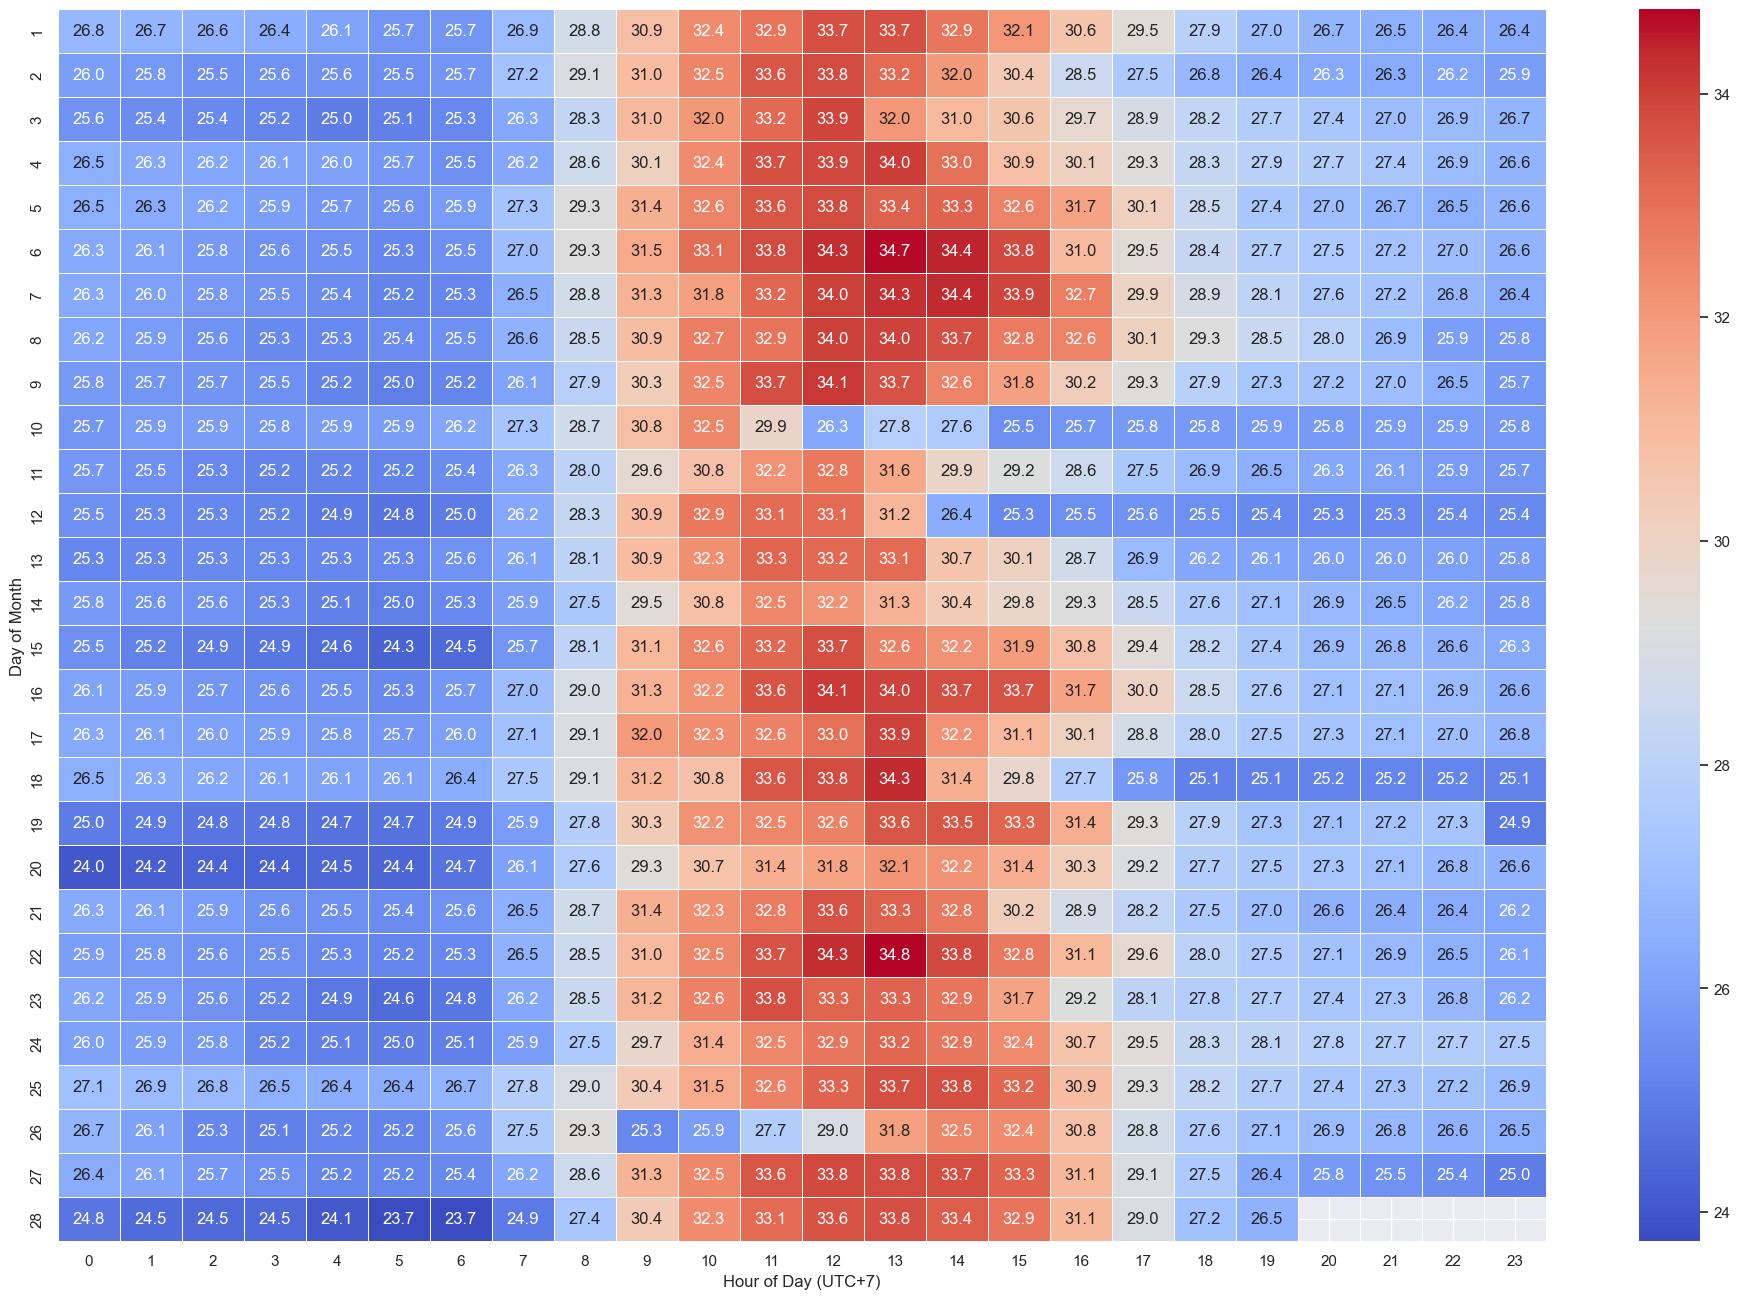

In [20]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp']
.dt.year == pilih_tahun) & (datacuaca['timestamp']
.dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month" + "_" + str(pilih_tahun) + "_" + str(pilih_bulan) + ".jpg")
plt.show()



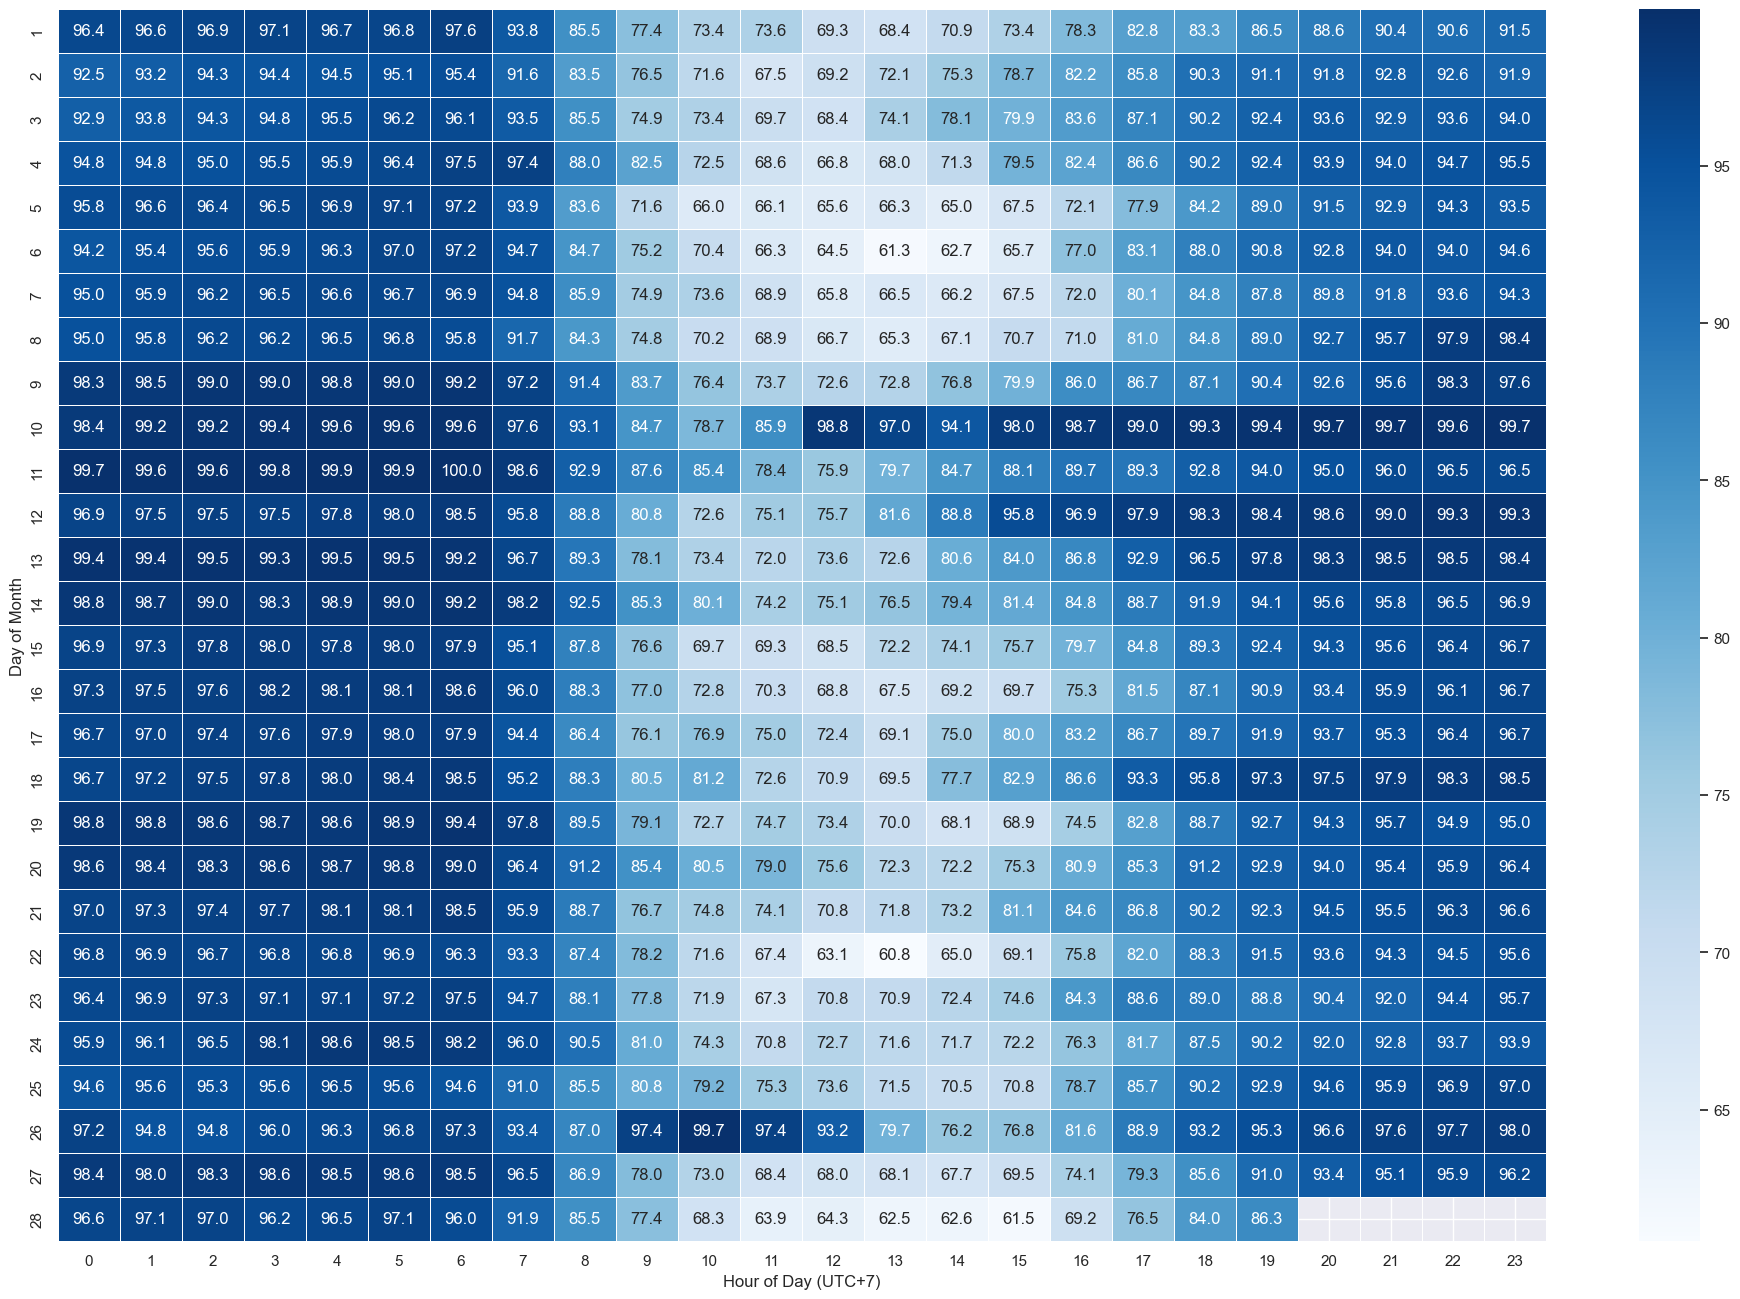

In [21]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(267.25, 0.5, 'Day of Month')

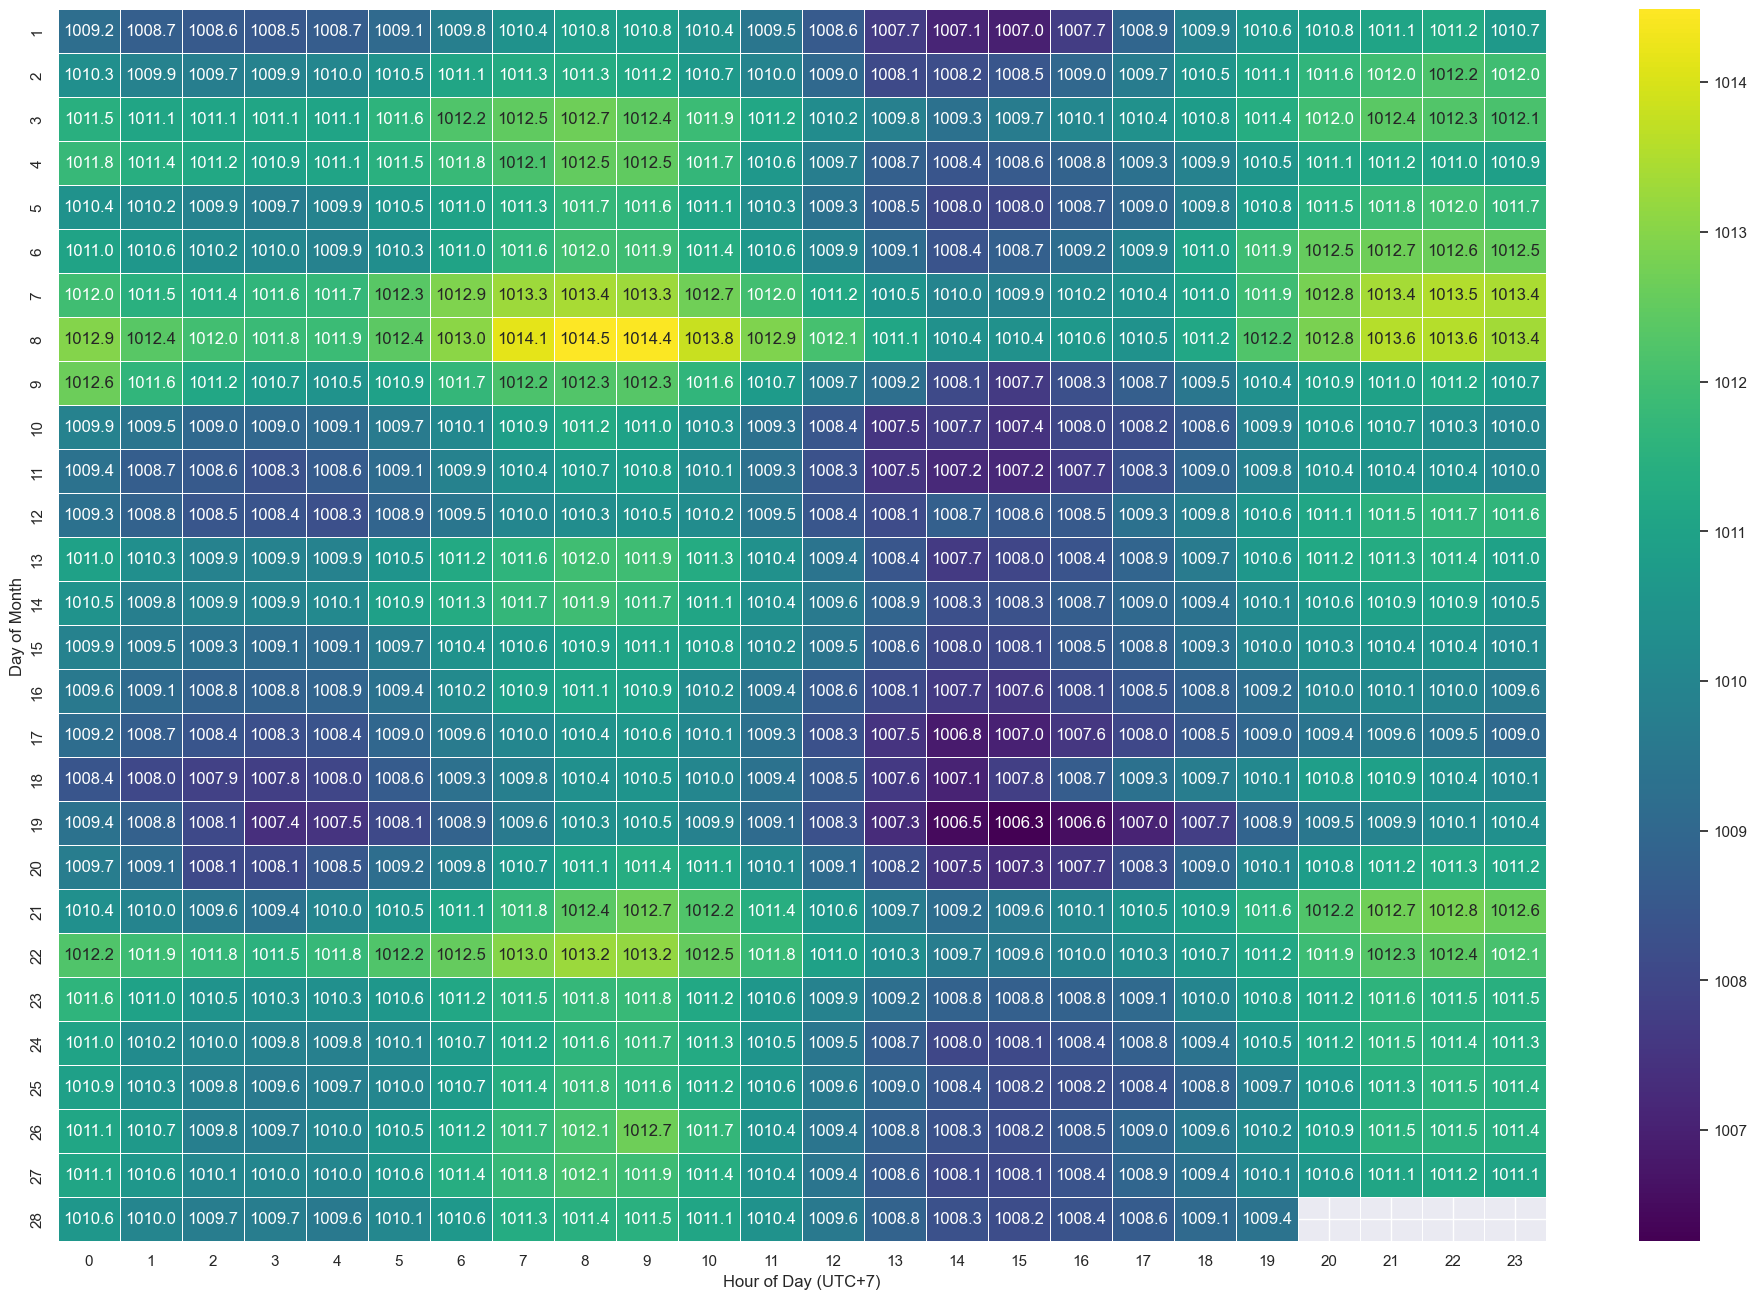

In [22]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(267.25, 0.5, 'Day of Month')

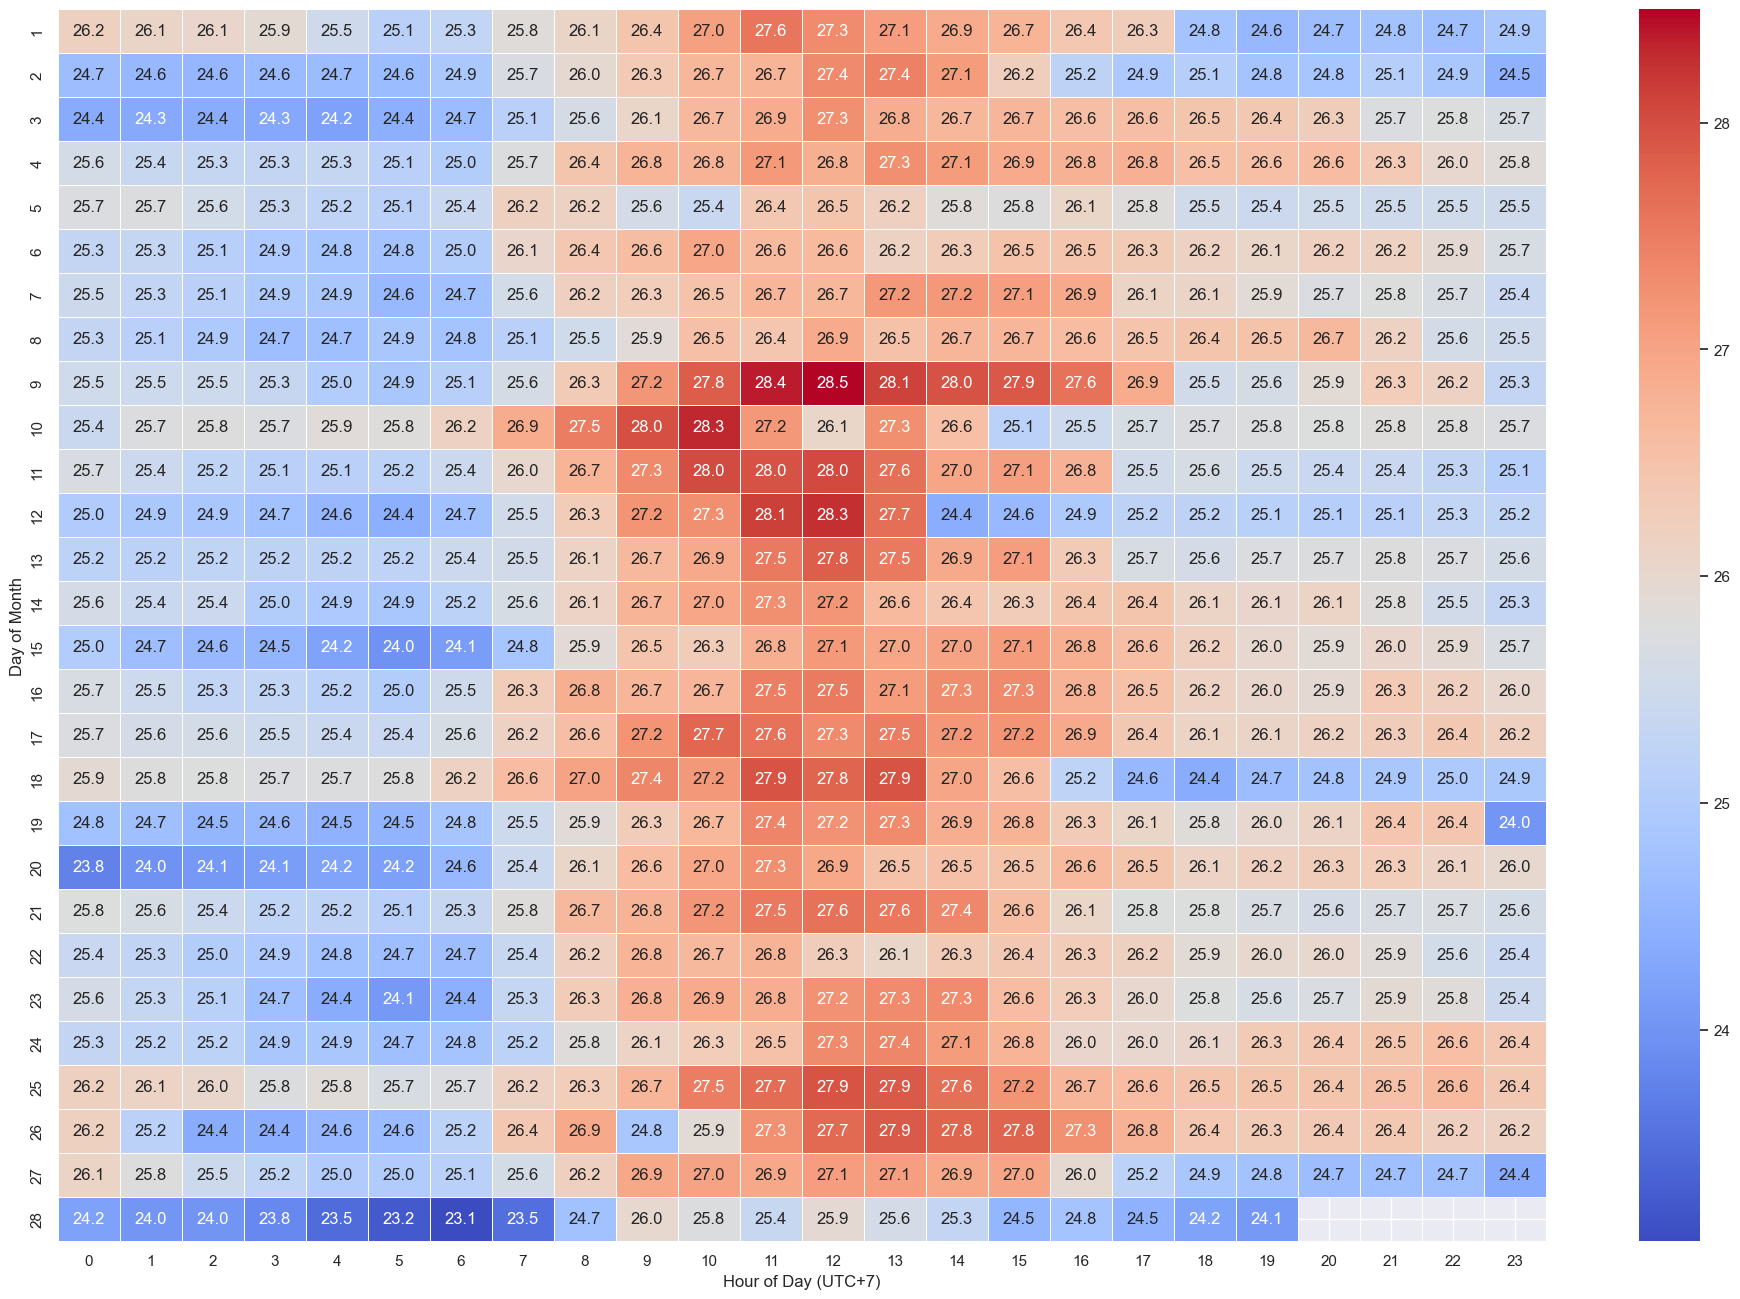

In [23]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
dew_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(dew_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(267.25, 0.5, 'Day of Month')

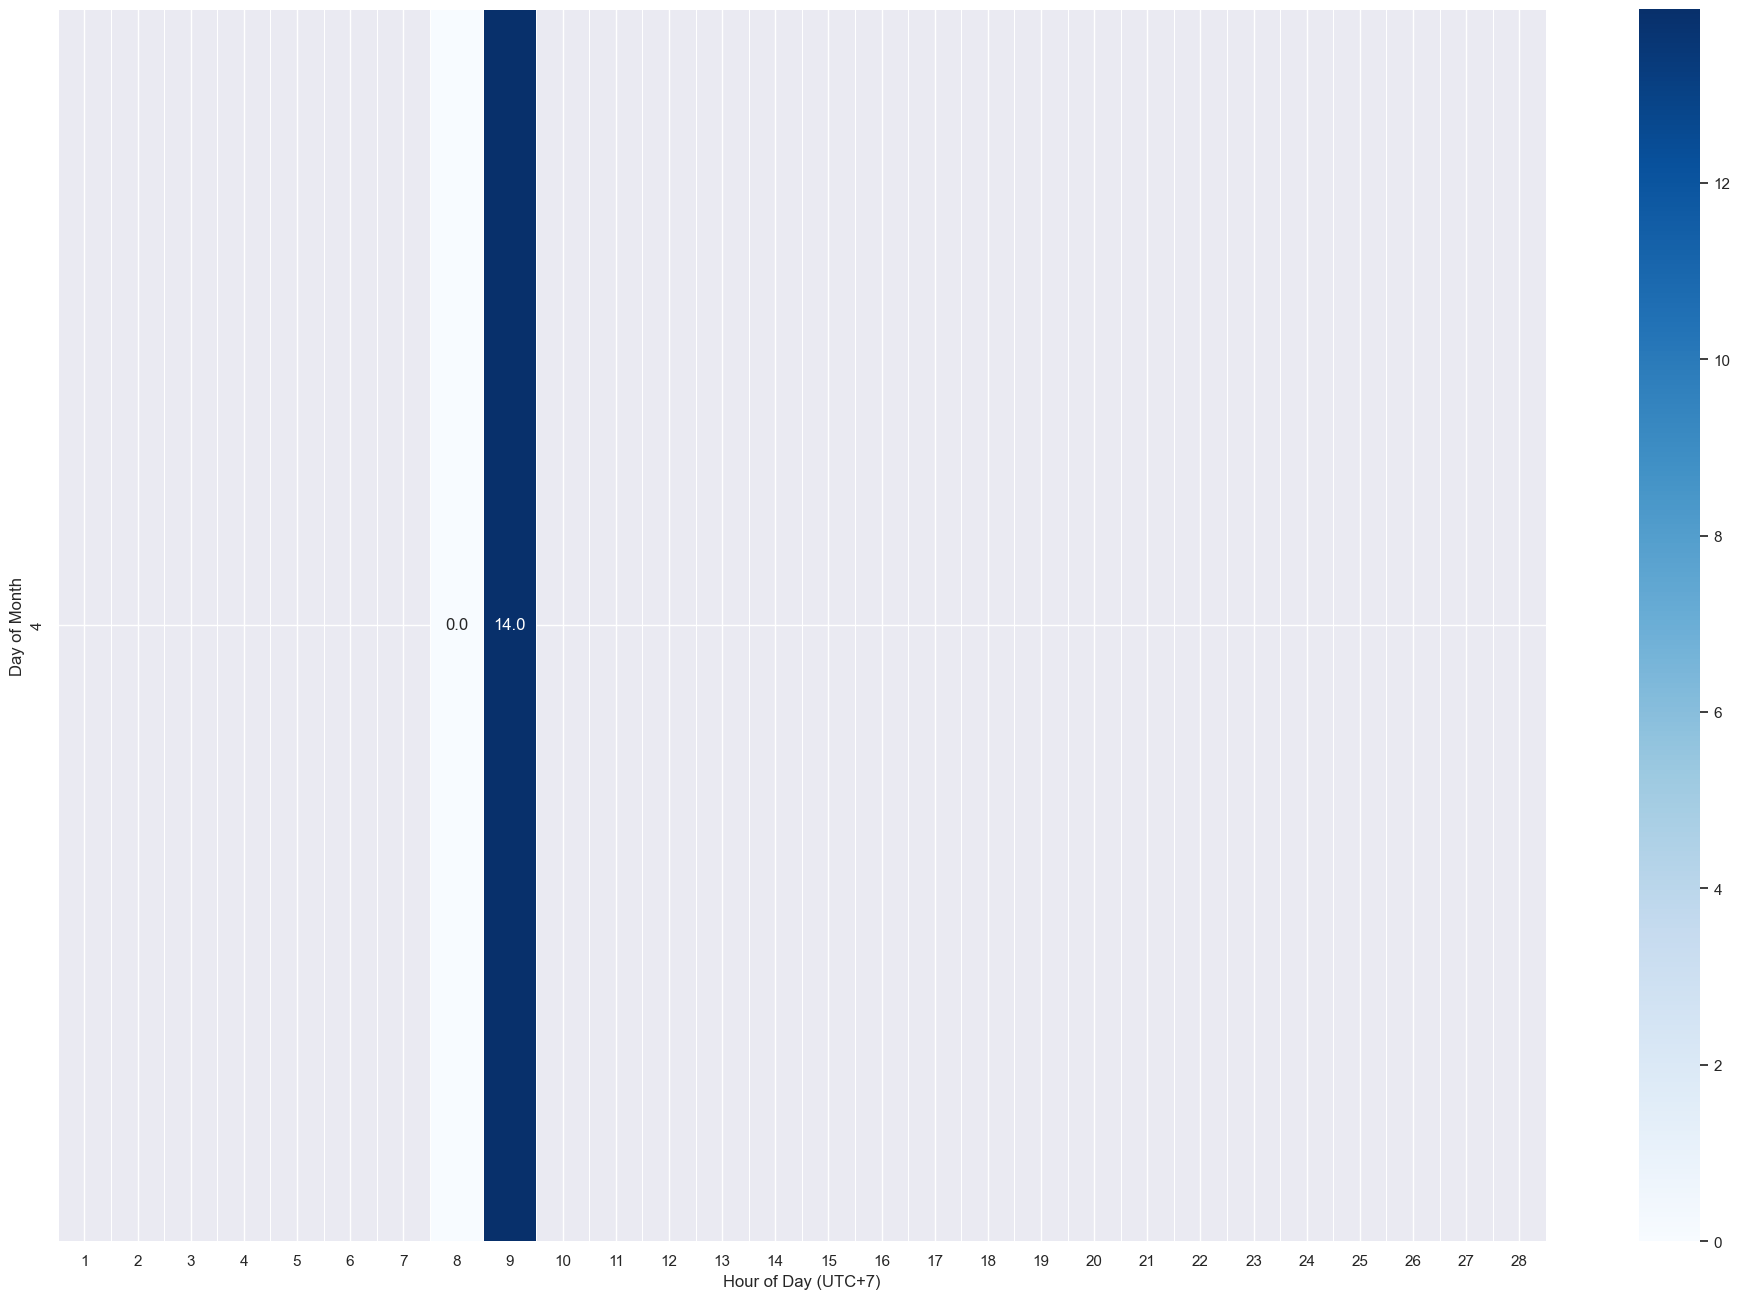

In [24]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['month', 'day']).agg({'rainfall': 'max'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
rainfall_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='rainfall')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rainfall_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(267.25, 0.5, 'Day of Month')

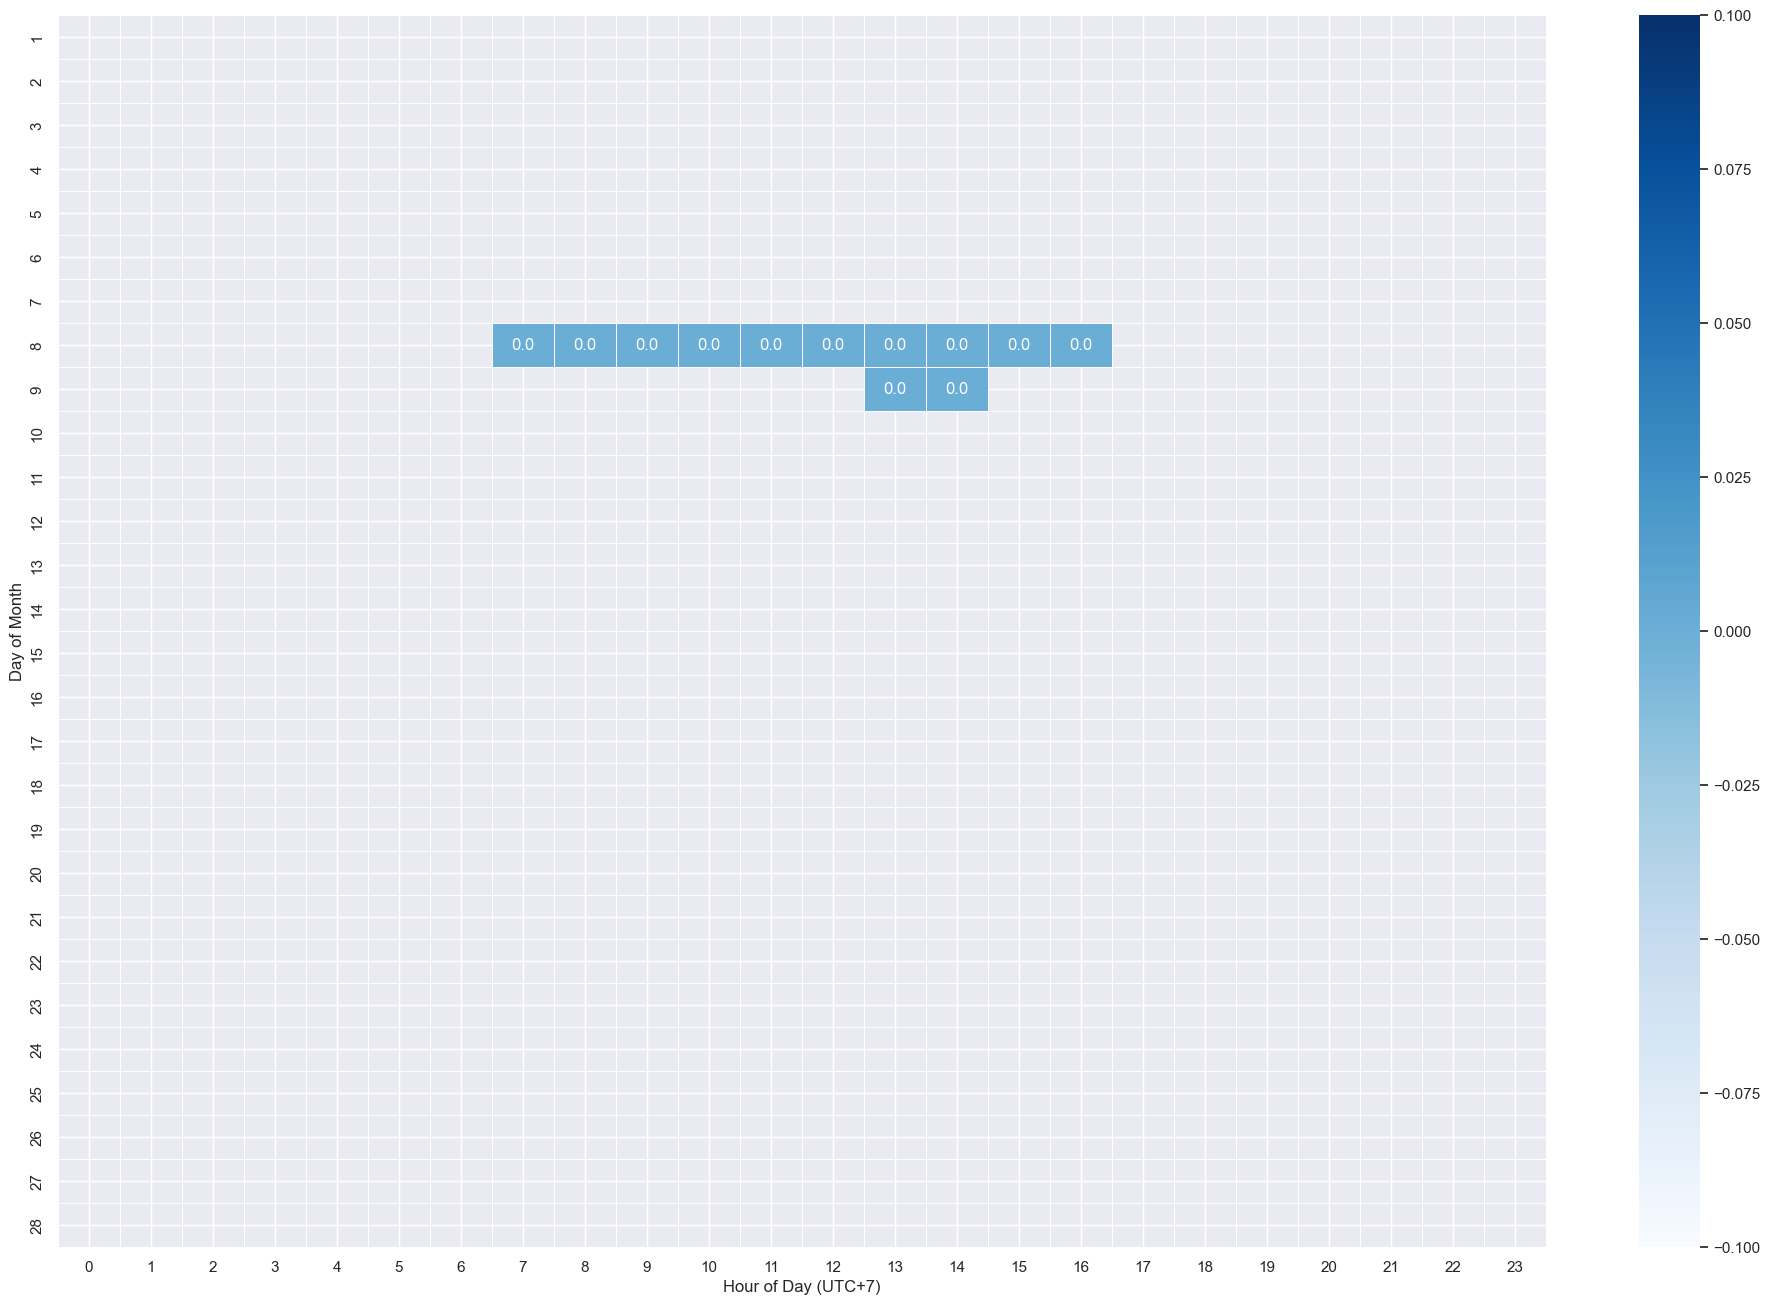

In [25]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'rainrate': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
rainrate_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='rainrate')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rainrate_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

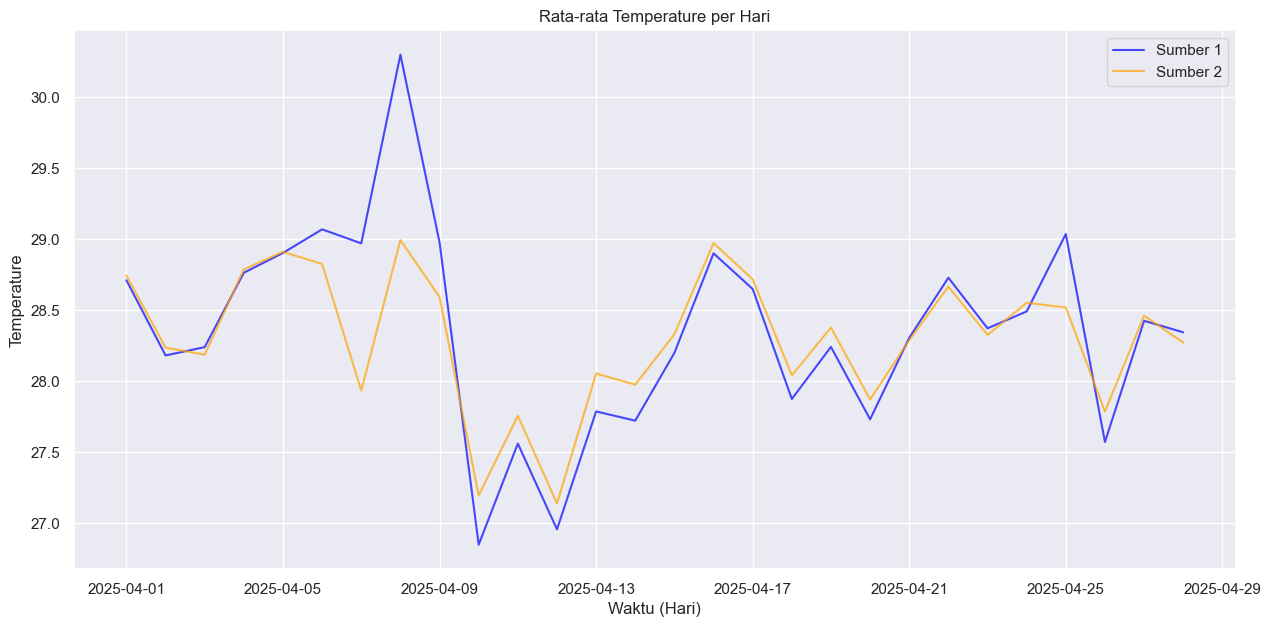

In [26]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
datacuaca['day'] = datacuaca['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat
datacuaca2['day'] = datacuaca2['timestamp'].dt.floor('d')

# Menghitung rata-rata per hari untuk kolom yang dipilih
datacuaca_daily = datacuaca.groupby('day')[column_to_plot].mean().reset_index()
datacuaca2_daily = datacuaca2.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_daily['day'], datacuaca_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_daily['day'], datacuaca2_daily[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

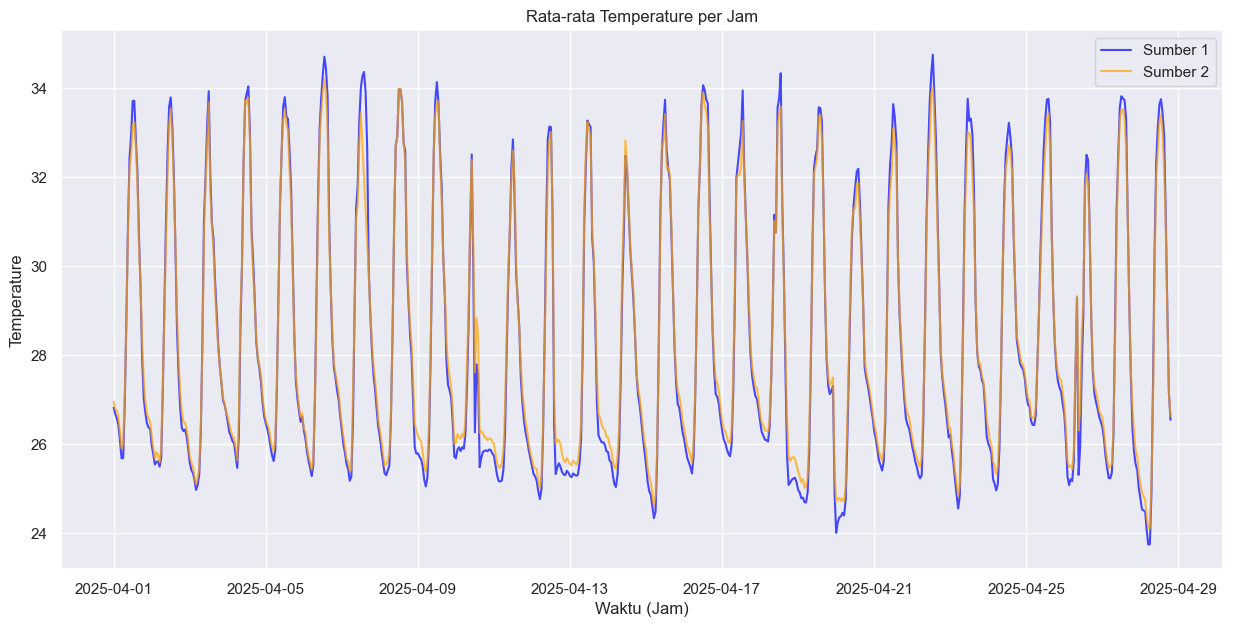

In [27]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat
datacuaca2['hour'] = datacuaca2['timestamp'].dt.floor('h')

# Menghitung rata-rata per jam untuk kolom yang dipilih
datacuaca_hourly = datacuaca.groupby('hour')[column_to_plot].mean().reset_index()
datacuaca2_hourly = datacuaca2.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_hourly['hour'], datacuaca2_hourly[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()